<a href="https://colab.research.google.com/github/Nemat-Allah-Aloush/Machine_Learning_Techinques/blob/main/Task_2_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nemat_Allah_Aloush_J41332c_MLT_2022_Task_5

* Name: Nemat Allah Aloush
* ISU group: J41332c
* ISU number: 336092

### Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from numpy.random import rand

### Part 1+2 .a Implementing gradient descent (GD) algorithm and apply it on a function
The function to find its minimum by grasient desecent algo 
f(x,y) = x^2 + 2y^2 +6 

In [35]:
# Defining the function formula
def function (x,y):
  return  x**2 + 2 * y**2 + 6
# Defining the the derivative of the function of x
def dfdx(x,y):
    return 2*x
# Defining the the derivative of the function of y
def dfdy(x,y):
    return 4*y
# Gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])
# Implementation of gradient descent (GD) algorithm
def grad_descent_mult(df,x_prev,learn_rate):
    epsilon = 0.0001
    grad_itter = 0    
    seq_x = []
    seq_y = []
    losses = []
    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        fn = function(x_prev[0], x_prev[1])
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1   
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        loss = np.abs(fn - function(x_prev[0], x_prev[1]))        
        losses.append(loss) 
    return (losses,x_next, grad_itter, seq_x,seq_y)

In [25]:
# Defining the function to apply GD on it
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = function(X,Y)

In [38]:
# calling GD function
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print(f'Minimum number (x, y) from gradient descent: {grad_output[1]}')
print(f'Number of gradient descent iteration: {grad_output[2]}')


Minimum number (x, y) from gradient descent: [1.31621704e-04 4.19430400e-15]
Number of gradient descent iteration: 20


### Part 1+2.b Implementing Adam's optimization algorithm and apply it on a function
The function to find its minimum by grasient desecent algo 
f(x,y) = 4x^2 + 5y^2 +6 

In [39]:
# Implementation of Adam algorithm
def Adam(df, x_init, lr, beta1=0.9, beta2=0.999, constant=1e-8):
    epsilon = 0.0001
    iter = 0
    moment = 0
    rmsprop = 0
    losses = []
    seq_x, seq_y = [], []    

    while True:
        iter += 1 
        # function value at current points
        fn = function(x_init[0], x_init[1])        
        # calculating gradient
        gradient = df(x_init[0], x_init[1])  
        # moment, rmsprop
        moment = (beta1 * moment) + ((1 - beta1) * gradient)
        rmsprop = (beta2 * rmsprop) + ((1 - beta2) * np.power(gradient, 2))
        # correcting
        moment_corr = moment / (1 - np.power(beta1, iter))
        rmsprop_corr = rmsprop / (1 - np.power(beta2, iter))
        # updating step
        x_init = x_init - (lr * moment_corr / (np.sqrt(rmsprop_corr) + constant))
        seq_x = np.append(seq_x, x_init[0])
        seq_y = np.append(seq_y, x_init[1])
        loss = np.abs(fn - function(x_init[0], x_init[1]))        
        losses.append(loss)               
        if loss <= epsilon:
            break
    return (losses, x_init, iter, seq_x, seq_y)

In [28]:
# Calling Adam
adam = Adam(grad_vector, np.array([6,2]), 0.2)

print(f'Minimum loss: {adam[0][-1]}')
print(f'Minimum number (x, y) from Adam: {adam[1]}')
print(f'Number of Adam iteration: {adam[2]}')

Minimum loss: 9.037666306177528e-05
Minimum number (x, y) from Adam: [-0.16239038  0.16010901]
Number of Adam iteration: 43


### Part 3. Illustratation of the process of finding an extremum 
The Illustratation is in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [29]:
# Illustration Function
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

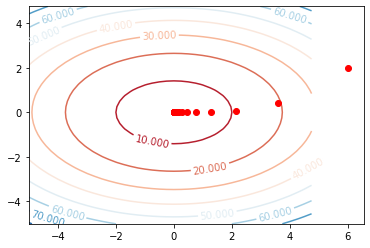

In [15]:
# Illustration of GD Algo
contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

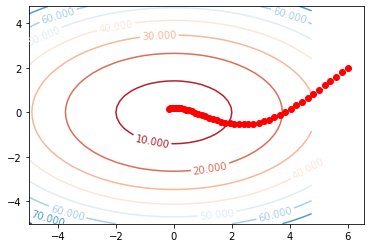

In [30]:
# Illustration of Adam result
contour_plot(adam[3], adam[4], np.array([6,2]))

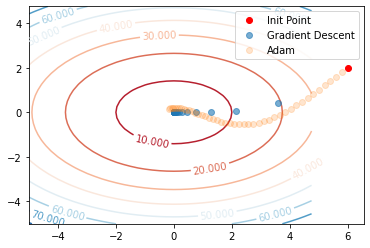

In [32]:
# Illustratation of both processes of finding an extremum 
plt.figure(1)
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
# initial point
plt.plot(6, 2, 'ro', label='Init Point')

# gradient descent algorithm
plt.plot(grad_output[3], grad_output[4], 'o', label='Gradient Descent', alpha=0.6)
# Adam
plt.plot(adam[3], adam[4], 'o', label='Adam', alpha=0.2)
plt.legend()
plt.show()

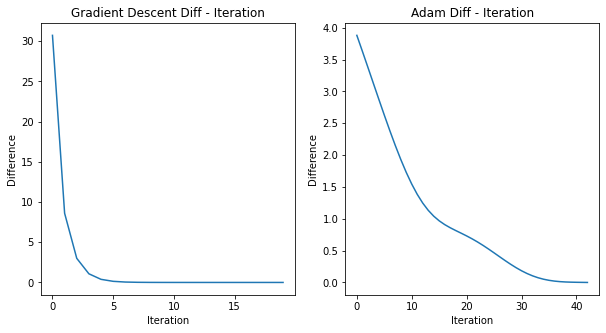

In [37]:
# Values difference graph depending on iteration.
# GD
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(list(range(grad_output[2])), grad_output[0])
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Gradient Descent Diff - Iteration')
# Adam
plt.subplot(1,2,2)
plt.plot(list(range(adam[2])), adam[0])
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Adam Diff - Iteration')

plt.show()